In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
my_data = pd.read_csv("reg1112.csv")

In [118]:
titanic_df =sns.load_dataset("titanic")


In [131]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,26.0,1,2,23.4500,S,Third,woman,False,B,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [125]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         890 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [124]:
titanic_df["deck"].ffill(axis = 0,inplace=True)

In [126]:
titanic_df["age"].bfill(axis='rows',inplace=True)

In [123]:
titanic_df["embark_town"].bfill(axis='rows',inplace=True)

In [127]:
titanic_df["embarked"].bfill(axis='rows',inplace=True)

In [110]:
titanic_df.isna().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

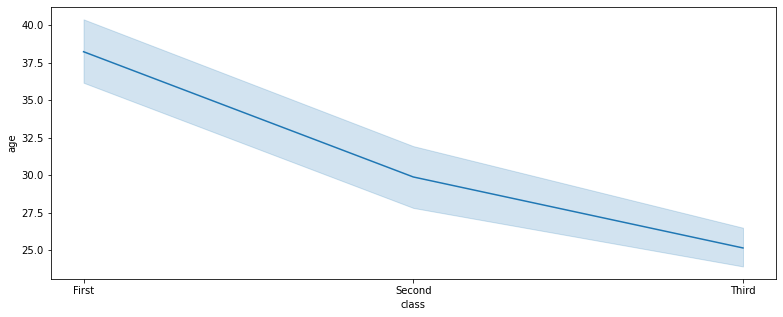

In [81]:
plt.figure(figsize=(13,5))
sns.lineplot(x = "class", y = "age", data = titanic_df)
plt.title("Passenger class with age")
plt.show()


<AxesSubplot:xlabel='who', ylabel='age'>

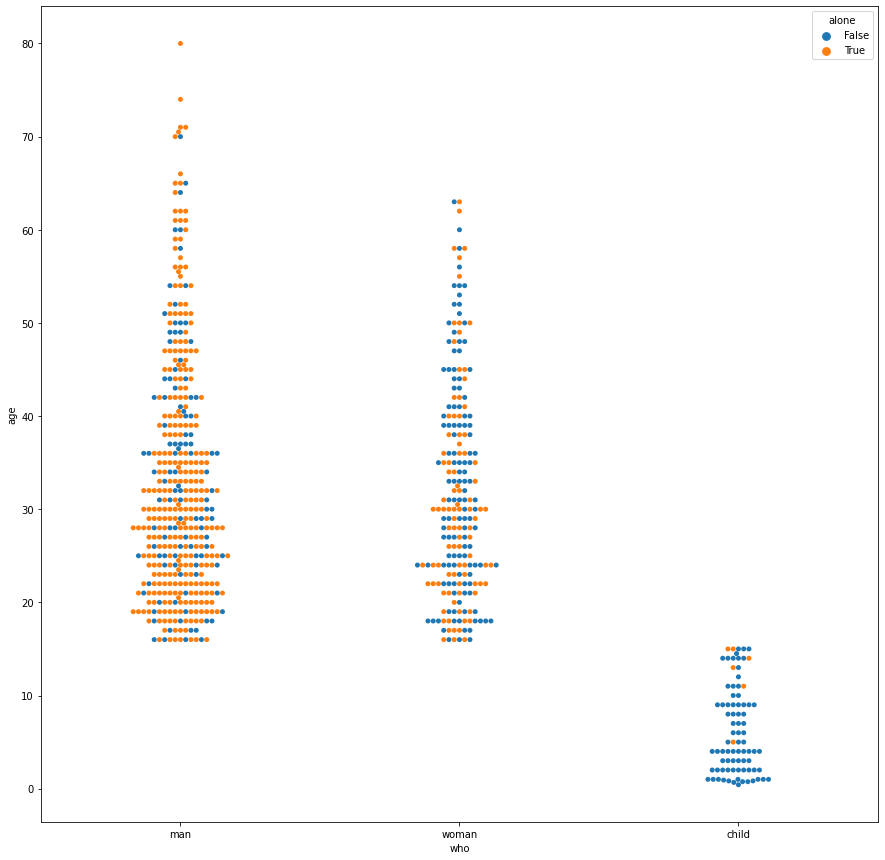

In [107]:
plt.figure(figsize=(15,15))
sns.swarmplot(x=titanic_df['who'],
              y=titanic_df['age'],hue=titanic_df['alone'])
plt.title("Age and whether the person alone or not?")

C:\Users\abu3a\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\abu3a\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='who', ylabel='fare'>

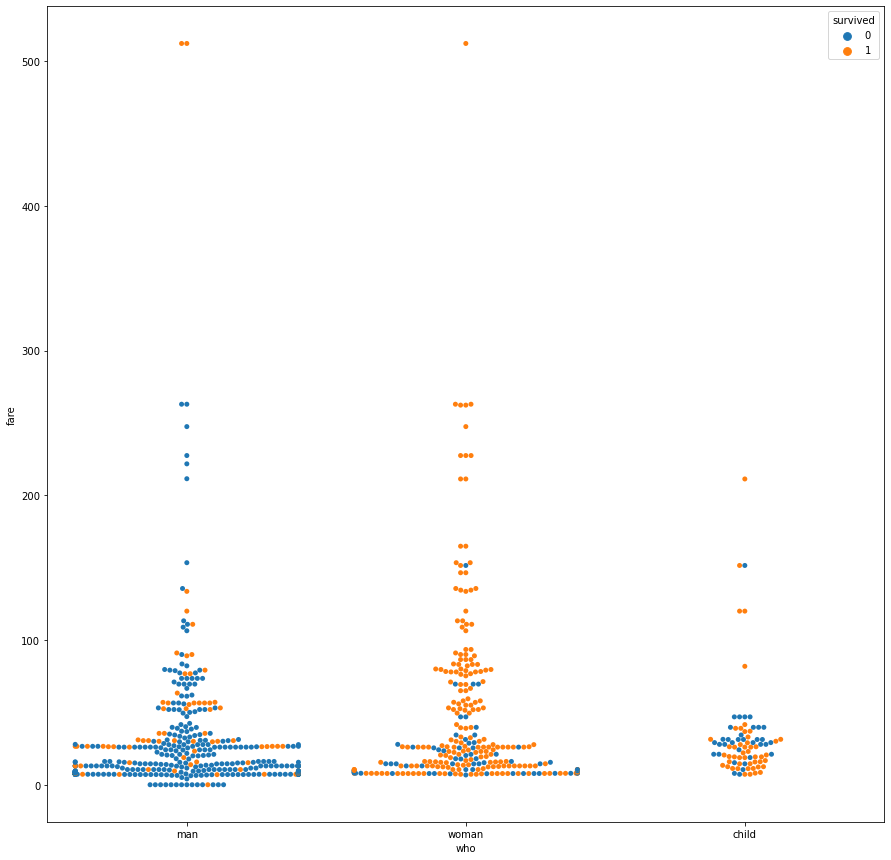

In [104]:
plt.figure(figsize=(15,15))
sns.swarmplot(x=titanic_df['who'],
              y=titanic_df['fare'],hue=titanic_df['survived'])
plt.title("Fare and who(man-woman-child) death")


<AxesSubplot:xlabel='embark_town', ylabel='Count'>

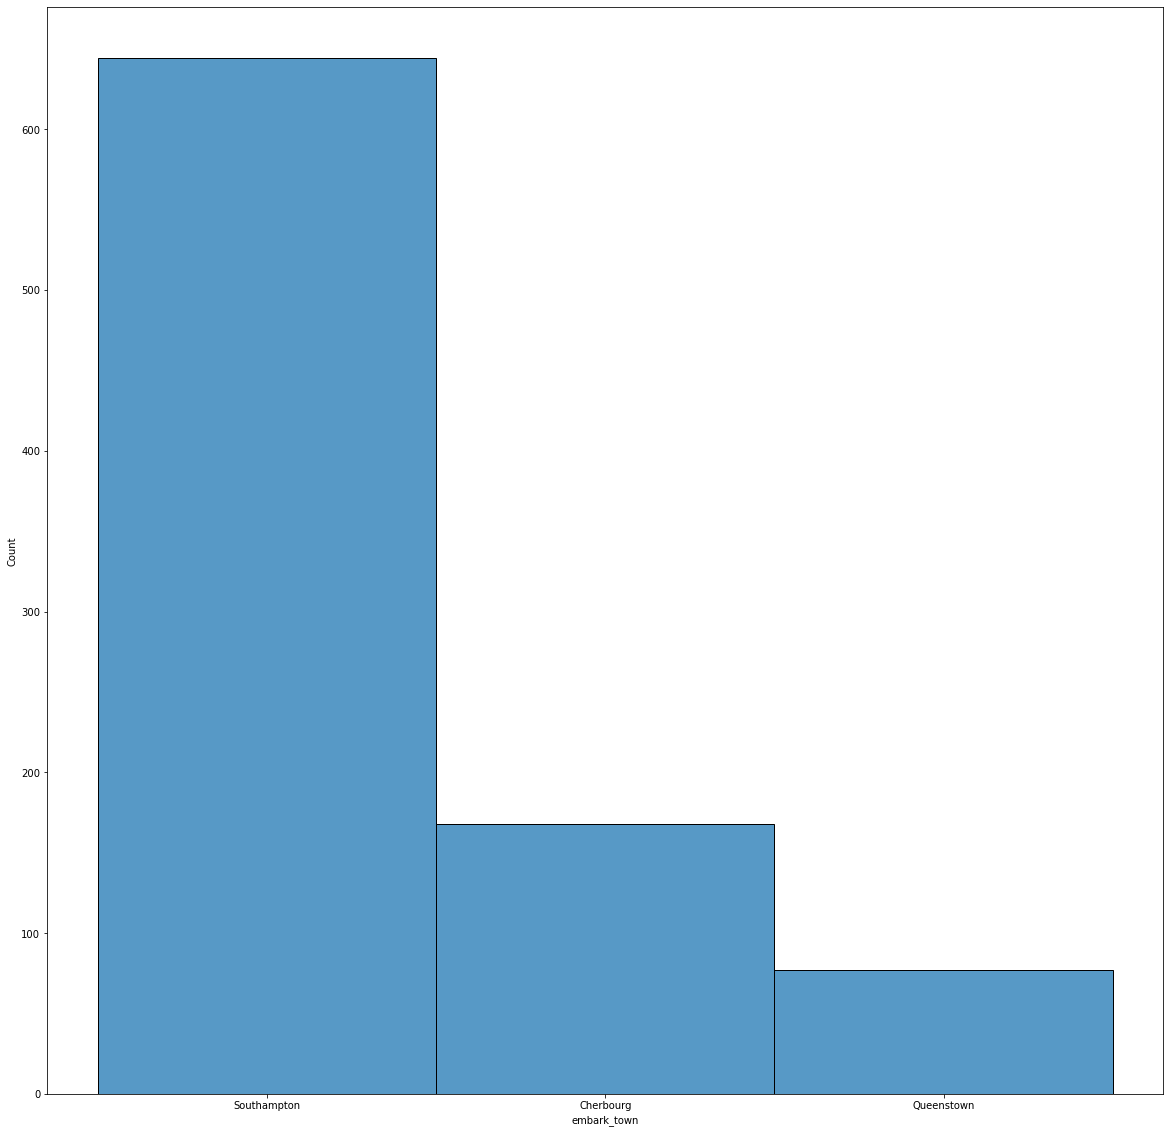

In [94]:
plt.figure(figsize=(20,20))
# Histogram 
sns.histplot(titanic_df['embark_town'])
plt.title("Towns")

Text(0.5, 1.0, 'Number of children and class')

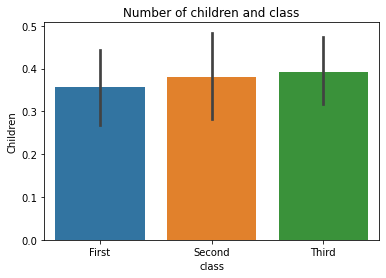

In [148]:
sns.barplot(x=titanic_df['class'], y=titanic_df['parch'] )
plt.ylabel("Children")
plt.title("Number of children and class")

Text(0.5, 1.0, 'Percentage of male and female')

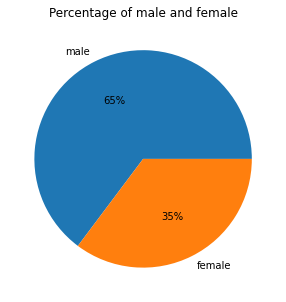

In [149]:
plt.figure(figsize=(13,5))
plt.title("")
labels = 'male','female'
Pie_chart = plt.pie(titanic_df['sex'].value_counts(), labels = labels,autopct='%.0f%%')
plt.title("Percentage of male and female")

C:\Users\abu3a\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Children')

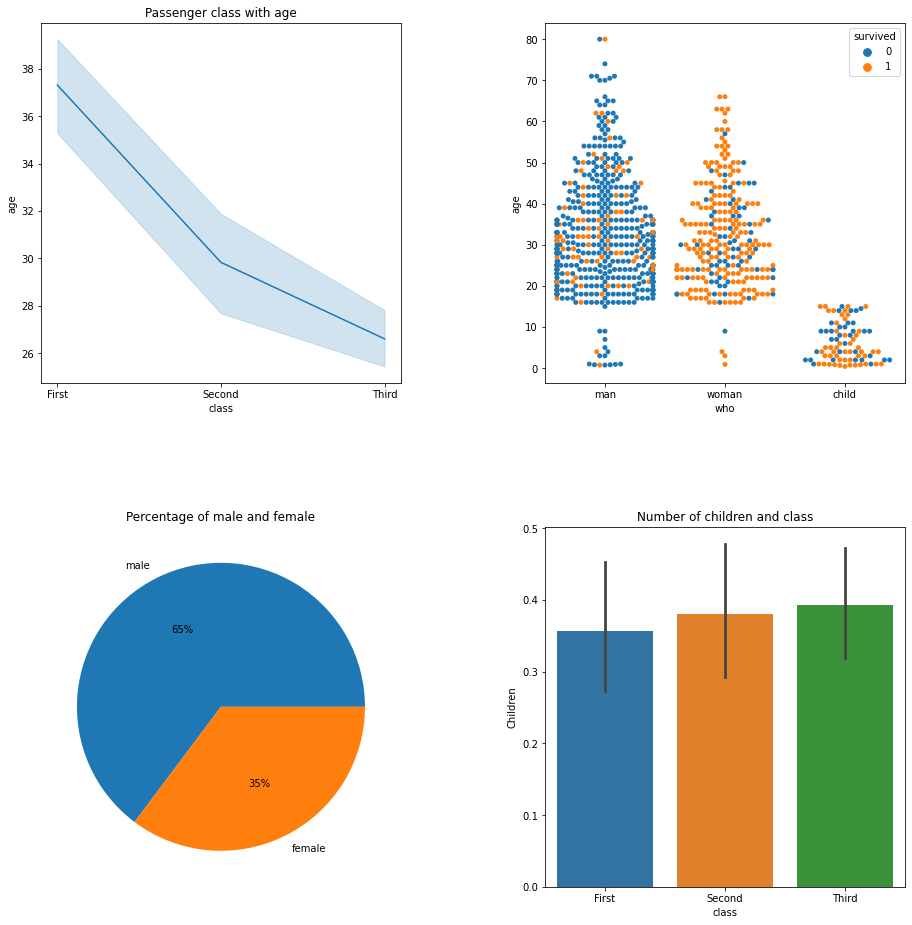

In [153]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.4, wspace=0.4)
plt.subplot(2, 2, 1)
sns.lineplot(x = "class", y = "age", data = titanic_df)
plt.title("Passenger class with age")
plt.subplot(2, 2, 2)
sns.swarmplot(x=titanic_df['who'],
              y=titanic_df['age'],hue=titanic_df['survived'])
plt.title("Passenger class with age")
plt.subplot(2, 2, 3)
labels = 'male','female'
Pie_chart = plt.pie(titanic_df['sex'].value_counts(), labels = labels,autopct='%.0f%%')
plt.title("Percentage of male and female")
plt.subplot(2, 2, 4)
sns.barplot(x=titanic_df['class'], y=titanic_df['parch'] )
plt.title("Number of children and class")
plt.ylabel("Children")


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
